# Simple LUME-Genesis example

In [2]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from genesis import Genesis
import os

# Genesis binary
if 'GENESIS_BIN' not in os.environ:
    os.environ['GENESIS_BIN'] = os.path.expandvars('$HOME/Code/genesis/bin/genesis')

In [4]:
# Make genesis object with default input
G = Genesis(verbose=True)
G.path

Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmptva5951f


'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmptva5951f'

In [5]:
# Turn on field output
G.input['idmpfld'] = 1
# Turn on particle output
G.input['idmppar'] = 1
G.input['npart'] = 2048

# Turn on history
G.input['ippart'] = 10
G.input['ipradi'] = 0
G.input['ncar']

print(G)

Genesis configured in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmptva5951f


In [6]:
# Run genesis with default lattice 
G.run()

init dir:  /Users/chrisonian/Code/GitHub/lume-genesis/examples
running genesis in /private/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmptva5951f
-------------------------------
Genesis 1.3 has begun execution
(Version 1.0 Unix)

Please enter input file name 
***  Warning: Size of particle file [Mbytes]:  14     
Slice     1: Simulation  10% completed.
Slice     1: Simulation  20% completed.
Slice     1: Simulation  30% completed.
Slice     1: Simulation  40% completed.
Slice     1: Simulation  50% completed.
Slice     1: Simulation  60% completed.
Slice     1: Simulation  70% completed.
Slice     1: Simulation  80% completed.
Slice     1: Simulation  90% completed.
Slice     1: Simulation 100% completed.
***  writing history record for slice     1
***  closing files

Genesis run has finished
------------------------
Loaded output: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmptva5951f/genesis.out


In [7]:
# This is the working path
G.path

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmptva5951f'

In [8]:
# Contents of this
!ls -ahl {G.path}

total 33248
drwx------    9 chrisonian  staff   288B Nov  6 14:30 .
drwx------@ 141 chrisonian  staff   4.4K Nov  6 14:30 ..
-rw-r--r--    1 chrisonian  staff   2.0K Nov  6 14:30 genesis.in
-rw-r--r--    1 chrisonian  staff   1.3K Nov  6 14:30 genesis.lat
-rw-r--r--    1 chrisonian  staff   370K Nov  6 14:30 genesis.out
-rw-r--r--    1 chrisonian  staff   984K Nov  6 14:30 genesis.out.dfl
-rw-r--r--    1 chrisonian  staff    96K Nov  6 14:30 genesis.out.dpa
-rw-r--r--    1 chrisonian  staff    15M Nov  6 14:30 genesis.out.par
-rw-r--r--    1 chrisonian  staff    53B Nov  6 14:30 run


In [9]:
# Get a hash of the input
G.fingerprint()

'f9a2206c05184a4ee20aa805a637efda'

In [10]:
# Loads the lattice file. Note that this has already been done on init. 
G.load_lattice()

loading lattice:  /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmptva5951f/genesis.lat


In [11]:
# Lattice parameters
G.lattice_params

{'version': 1, 'unitlength': '0.03 # meters'}

In [12]:
# Get a list of z from the output
zlist = G.output['lattice']['z']

In [13]:
# Get some slice data
slicedat =G.output['slice_data']
slicedat[0].keys()

dict_keys(['index', 'current', 'data'])

In [14]:
# These are the available columns
slicedat[0]['data'].keys()

dict_keys(['power', 'increment', 'p_mid', 'phi_mid', 'r_size', 'energy', 'bunching', 'xrms', 'yrms', 'error', '<x>', '<y>', 'e-spread', 'far_field'])

In [15]:
mydat = slicedat[0]['data']['power']

In [16]:
# Test Bokeh plotting
from bokeh.plotting import figure, output_file, show, output_notebook

#output_file("line.html")
output_notebook(verbose=False, hide_banner=True)

p = figure(plot_width=800, plot_height=400, y_axis_type='log')

# add a line renderer
p.line(zlist, mydat, line_width=2)

p.xaxis.axis_label = 'Z (M)'
p.yaxis.axis_label = 'power (W)'

show(p)

# Particle file

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,8]
import numpy as np
import os
import time

In [18]:
fname = G.path+'/genesis.out.par'
fname

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmptva5951f/genesis.out.par'

In [19]:
pdat = np.fromfile(fname, dtype=np.float).astype(float)
npart = G.input['npart']
nbunch = int(len(pdat)/6/npart)
nbunch

157

In [20]:
# gamma, phase, x, y, px/mc, py/mc
b = pdat.reshape(nbunch,6,npart)

In [21]:
len(b[0][2])

2048

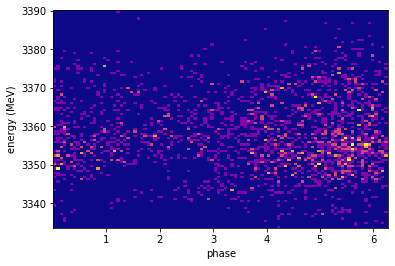

In [22]:
p = b[-1]
plt.hist2d(p[1]% (2*np.pi), 0.511*p[0], bins=[100,100], cmap=plt.get_cmap('plasma'))
plt.xlabel('phase')
plt.ylabel('energy (MeV)')
plt.savefig('frame.png')
plt.show()

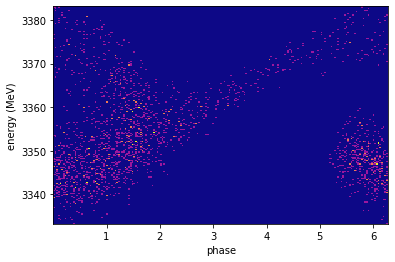

In [23]:
def frame(i, ):
    p = b[i]
    plt.hist2d(p[1]% (2*np.pi), 0.511*p[0], bins=[200,200], cmap=plt.get_cmap('plasma'))
    plt.xlabel('phase')
    plt.ylabel('energy (MeV)')
    plt.savefig('frame_'+str(i)+'.png')
    
frame(100)

In [ ]:
# Make frames
for i in range(nbunch):
    frame(i);

In [ ]:
# Make movie
!ffmpeg -framerate 10 -i frame_%d.png -c:v libx264 -c:a libfdk_aac output.mp4